<a href="https://colab.research.google.com/github/DrDavidL/dhds/blob/main/nntandmore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Illustrating Relative Risk and NNT for Cohort Studies

When working on research projects, we usually have raw data, that is outcomes are not pre-formatted in a 2x2 table. In this notebook we will first show how to assemble a 2x2 contingency table from a spreadsheet of raw data and then analyze the table. 

>Remember that a "cohort" is a sample population followed for a meaningful length of time. Therefore, cohort studies can be analyzed prospectively or retrospectively. And, since the subjects studied in a cohort are initially free of the outcome of interest, relative risks for developing the outcome within the studied population can be calculated. (Conversely, for *case-control* studies, subjects are selected explicitly for cases and for controls by the researchers. In that case, without a single population at risk to use for the denominator, the odds for an exposure having occurred are calculated within the case and control groups separately. Then the odds ratio across groups should be used. A separate notebook will review the odds ratio in more details!)

Back to relative risk and **cohort** studies: Let's first make the 2x2 table from raw data and then see if we can define functions for future use to calculate RRR, ARR, and NNT. This little exercise will show you how these steps are done and reinforce the definitions along the way.



Let's first start with our data table from [this study](https://pubmed.ncbi.nlm.nih.gov/20528867/) about prenatal alcohol exposure and subsequent behavioral problems:

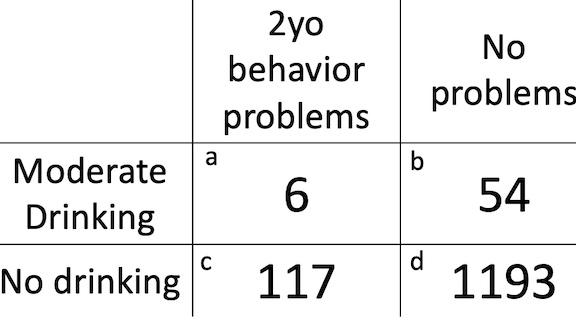

In a typical project, though, we'll start with the raw data and build the contingency table for the categories. I created a spreadsheet we'll use with the raw data for this analysis. For when you do already have the contingency table, though, a great website to see what happens is [here](https://www.medcalc.org/calc/relative_risk.php). If you plug in the data, you'll see the following:

Note the NNT (actually NNH) is what we'd expect but given the relatively small sample sizes note the less than compelling p value and confidence internal (separate topics).



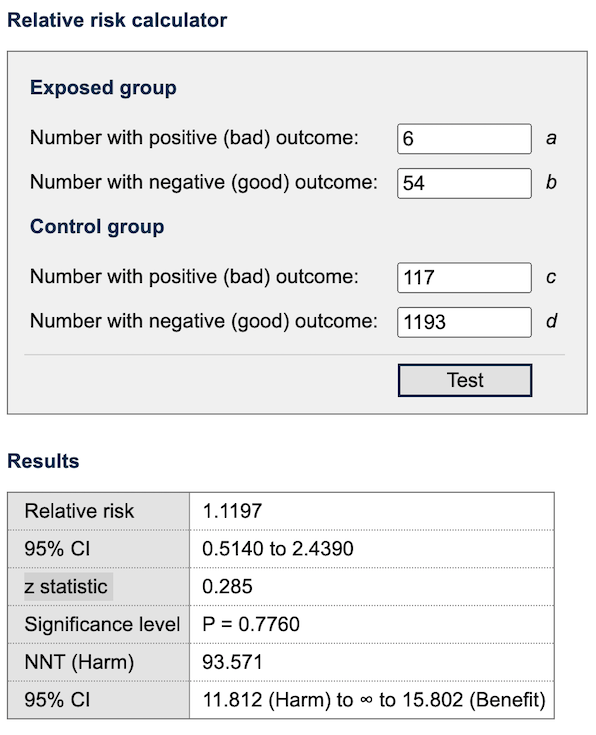

In [ ]:
# First, run this cell to make our cloud computer ready.
# And, for any cell with the "play" button to the left, run it in sequence when reading the page. If you skip one, there will be an error.*
import pandas as pd
import numpy as np

# Let's bring in the raw data from the file saved here.
website = 'https://raw.githubusercontent.com/DrDavidL/dhds/main/alcoholeffects.csv'

# Now, we ask our computer to "read" the file and save it as a "datframe" for analysis.
stored_data = pd.read_csv(website)

# Let's view the first 5 rows. For the column values, "1" means exposed to alcohol and "1" means presence of behavioral issues. 
stored_data.head()

Let's now use a function to create the 2x2 table for us automatically from our raw data.

In [ ]:
# This crosstab function aligns data in a 2x2 format.
ct = pd.crosstab(stored_data.Exposed, stored_data.Behavioral_issue)
# This command displays the table.
ct


All the values are now present in the table above and are computable. If desired, we can add column names and shift the order of the columns so it would look identical to the 2x2 above. The point of that little exercise was to show - with raw data, we can quickly assemble a 2x2 diagram.

Next, let's use the numbers from this 2x2 diagram and reformat so it's easier to understand and directly mimics the original 2x2 from the article. This step, in addition to adjusting format a bit for clarity, will provide you with a permanent tool to update values in cells a, b, c, and d and quickly perform your own analysis. 


# Making our table computable.

The following code image from the cell below will reorder the summary frequencies in the order of our 2x2 table (and adds labels so it's clearer);

```
 ROW 1: {"": "Moderate Drinking", "2yo behavior problems": 6, "No Problems": 54},
 ROW 2:     {"": "No Drinking", "2yo behavior problems": 117, "No Problems": 1193}
```

The original 2x2 table at the of this notebook has 2 data rows. That is, the top row is a header row of column names and isn't considered a "row of data." So, for the above code example, the use of two quotes without anything in the middle ``` "" ``` is simply because the first column has a blank column name. The value for that cell is "Moderating Drinking" and follows the colon. Then, the value for the next cell in that row is 6, and the third value is 54. You likely now see the pattern to alter the 2x2 with different values based on your data set as needed.

OK - onto the real code below to make our computable table! Feel free to try different numbers in the code! The even appear below in our standard (a, b, c, d) order. The default numbers were from the study.









In [ ]:
cohort = pd.DataFrame([
     {"": "Moderate Drinking", "2yo behavior problems": 6, "No Problems": 54},
     {"": "No Drinking", "2yo behavior problems": 117, "No Problems": 1193}
])

# See output below; a bit more clearly formatted with our manual creation.
cohort

# Let's review our definitions! 

Remember, the point of this exercise is bringing these calculations to life and saving a tool for future use:



```
Risk = Number with an outcome / Total in the group
Relative Risk (RR) = Risk for exposed / Risk for unexposed
Absolute Risk Reduction (ARR) = Risk for exposed - Risk for unexposed
Number Needed to Treat (or harm) (NNT or NNH) = 1/ARR

Also expressed using 2x2 cell labels as:

Risk(exposed) = a / (a + b)
Risk(not exposed) = c / (c + d)
Relative Risk (RR) =  (a/(a+b)) / (c/(c+d))
Absolute Risk Reduction (ARR) = a/(a+b)  -  c/(c+d)
NNT = 1 / ARR
```



In [ ]:
# To refer to a specific location in our table, we use coordinates. 
# The first row and column start with 0. 
# So, to make sure we understand this, let's print the number of 2yo 
# with behavioral problems who were exposed to moderate drinking. This is cell "a."
# Below, the 0 and the 1 refer to the first data row and the second column respectively.

print(cohort.loc[0][1])

In [ ]:
# Let's define our functions that accepts the table in this format and calculates
# RR, ARR, and NNT. We can then save these functions for our personal use here! 
# Don't forget to bookmark this site!

# Remember, per above, the "loc[0][1]" refers to the first row and 2nd column from our 2x2.
# Risk = Number with an outcome / Total in the group
# Relative Risk (RR) = Risk for exposed / Risk for unexposed
def relative_risk(df):
  relriskvalue = (df.loc[0][1] / (df.loc[0][1] + df.loc[0][2])) / (df.loc[1][1] / (df.loc[1][1] + df.loc[1][2]))
  relriskvalue = round(relriskvalue, 2)
  print("Relative Risk is: ", relriskvalue)

# Absolute Risk Reduction (ARR) = Risk for exposed - Risk for unexposed
def arr(df):
  arrvalue = df.loc[0][1] / (df.loc[0][1] + df.loc[0][2]) - df.loc[1][1] / (df.loc[1][1] + df.loc[1][2])
  arrvalue = round(arrvalue, 2)
  print("ARR is: ", arrvalue)

# Number Needed to Treat (or harm) (NNT or NNH) = 1/ARR
def nnt(df):
  nntvalue = 1/ (df.loc[0][1] / (df.loc[0][1] + df.loc[0][2]) - df.loc[1][1] / (df.loc[1][1] + df.loc[1][2]))
  nntvalue = round(nntvalue, 2)
  print("NNT is: ", nntvalue)

# Here we run these new functions we made against our 2x2 table!
relative_risk(cohort)
arr(cohort)
nnt(cohort)



Conclusion: By replacing the values in the calculable version of the 2x2 above, the subsequent cells will perform the calculations. 

Reflection: Look back one more time at the definitions above and the functions defined by the code. You should see how the definitions are turned into live tools by the code. And... remember you can change values to anything you'd like and re-run the cells to calculate to NNTs (or, ahem, use the link noted earlier to the web tool)! 

In [ ]:
# Optional!!! 

# The code below will also determine a p value assessing the null hypothesis that 
# there is no difference between the two groups. Try changing "6" from cell "a" below to a higher value.
# How high must we see cases before the p value is less than 0.05?

from scipy.stats import chi2_contingency
  
# defining the table

data = [
    # Beh  Nl  
    [ 6, 54 ], # Exposed
    [ 117, 1193 ]  # Not exposed
]

stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("The p value is " + str(p))
if p <= alpha:
    print('Reject the null hypothesis. There is an effect!')
else:
    print('The null hypothesis holds true.')

stat
